In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
df_laptop = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")

In [135]:
df_laptop.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [136]:
df_laptop.columns = df_laptop.columns.str.lower().str.replace(' ', '_')

<Axes: xlabel='final_price', ylabel='Count'>

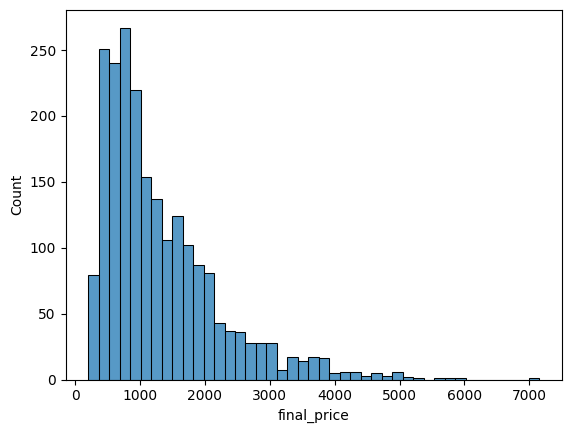

In [137]:
sns.histplot(df_laptop['final_price'])

<Axes: xlabel='final_price', ylabel='Count'>

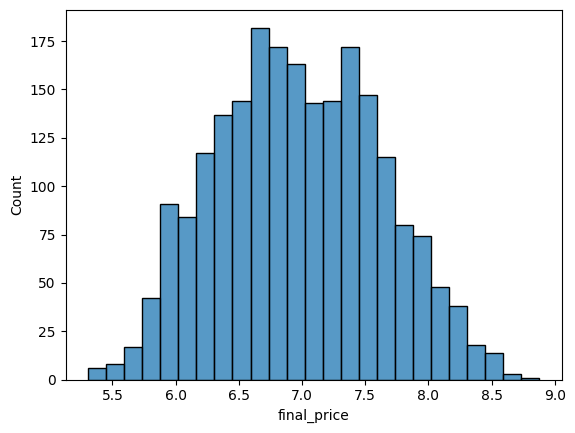

In [138]:
sns.histplot(np.log1p(df_laptop['final_price']))

In [139]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop        2160 non-null   object 
 1   status        2160 non-null   object 
 2   brand         2160 non-null   object 
 3   model         2160 non-null   object 
 4   cpu           2160 non-null   object 
 5   ram           2160 non-null   int64  
 6   storage       2160 non-null   int64  
 7   storage_type  2118 non-null   object 
 8   gpu           789 non-null    object 
 9   screen        2156 non-null   float64
 10  touch         2160 non-null   object 
 11  final_price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [140]:
df_laptop.isnull().sum()

,0
laptop,0
status,0
brand,0
model,0
cpu,0
ram,0
storage,0
storage_type,42
gpu,1371
screen,4


In [141]:
df_laptop['ram'].describe()

,ram
count,2160.000000
mean,15.413889
std,9.867815
min,4.000000
25%,8.000000
50%,16.000000
75%,16.000000
max,128.000000


In [142]:
n = len(df_laptop)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

In [143]:
n, n_train + n_val + n_test

(2160, 2160)

In [144]:
n_train, n_val, n_test

(1296, 432, 432)

In [145]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [146]:
df_train = df_laptop.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df_laptop.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df_laptop.iloc[idx[n_train+n_val:]].reset_index(drop=True)

In [147]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [148]:
df_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,1123.29
1,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No,201.05
2,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No,997.74
3,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No,1016.00
4,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No,2739.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1291,Asus P1411CJA-BV377R Intel Core i5-1035G1/8GB/...,Refurbished,Asus,P1411,Intel Core i5,8,256,SSD,NaN,14.0,No,549.00
1292,MSI Prestige 16 Studio A13VE-045XES Intel Core...,New,MSI,Prestige,Intel Core i7,32,1000,SSD,RTX 4050,16.0,No,1999.00
1293,Lenovo IdeaPad Gaming 3 15IAH7 Intel Core i5-1...,New,Lenovo,IdeaPad,Intel Core i5,16,512,SSD,RTX 3050,15.6,No,1059.00
1294,Lenovo Yoga 7 14ITL5 Intel Evo Core i7-1165G7/...,New,Lenovo,Yoga,Intel Evo Core i7,16,512,SSD,NaN,14.0,Yes,1671.00


In [149]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [150]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [151]:
df_train.iloc[10]

,10
laptop,Lenovo V15 G2 ITL Intel Core i7-1165G7/16GB/51...
status,New
brand,Lenovo
model,V15
cpu,Intel Core i7
ram,16
storage,512
storage_type,SSD
gpu,NaN
screen,15.6


In [152]:
def dot(xi, w):
  n = len(xi)
  res = 0.0
  for j in range(n):
    res += xi[j] * w[j]
  return res

In [153]:
def linear_regression(xi):
  return w0 + dot(xi, w)

In [154]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [155]:
base = ['ram','storage','screen']

In [156]:
X_train = df_train[base].values

In [157]:
df_train[base].mean()

,0
ram,15.666667
storage,599.101852
screen,15.163534


In [158]:
X_train = df_train[base].fillna(0).values
# X_train = df_train[base].fillna(df_train[base].mean()).values

In [159]:
w0, w = train_linear_regression(X_train, y_train)

In [160]:
w0, w

(6.7271637061124565, array([ 0.02630589,  0.00066041, -0.03651909]))

In [161]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

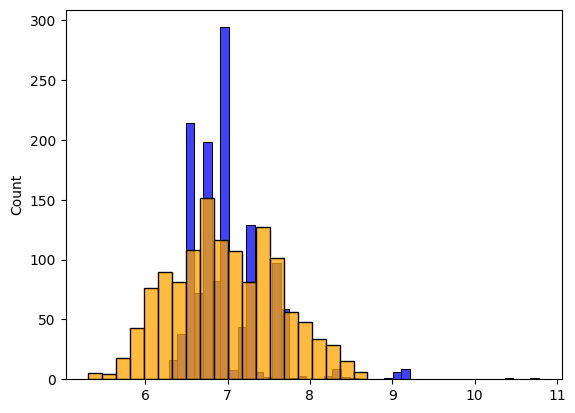

In [162]:
sns.histplot(y_pred, color='blue')
sns.histplot(y_train, color='orange')

In [163]:
def rmse(y, y_pred):
  error = y - y_pred
  se = error ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [164]:
rmse(y_train, y_pred)

0.44632651855038796

RMSE fillna 0 = 0.44632651855038796

RMSE fillna mean = 0.4460856669097624

In [165]:
rmse1 = round(0.44632651855038796, 2)
rmse2 = round(0.4460856669097624, 2)

In [166]:
rmse1, rmse2

(0.45, 0.45)

In [167]:
def prepare_X(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [168]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
rmse(y_train, y_pred)

0.44632651855038796

In [169]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4288635315474416

In [170]:
def train_linear_regression_reg(X, y, r=0.01):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  w0 = w_full[0]
  w = w_full[1:]

  return w0, w

In [171]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
  X_train = prepare_X(df_train)
  w0, w = train_linear_regression_reg(X_train, y_train, r=r)

  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)

  print([r, w0, round(score,2)])

[0, 6.7271637061124565, 0.43]
[0.01, 6.721004333260311, 0.43]
[0.1, 6.666075503828241, 0.43]
[1, 6.162616499461121, 0.43]
[5, 4.616086176497502, 0.46]
[10, 3.5167547207936254, 0.51]
[100, 0.6849263362660534, 0.67]


In [172]:
rmses = []

for seed in [0,1,2,3,4,5,6,7,8,9]:
  idx = np.arange(n)
  np.random.seed(seed)
  np.random.shuffle(idx)

  df_train = df_laptop.iloc[idx[:n_train]].reset_index(drop=True)
  df_val = df_laptop.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
  df_test = df_laptop.iloc[idx[n_train+n_val:]].reset_index(drop=True)

  y_train = np.log1p(df_train.final_price.values)
  y_val = np.log1p(df_val.final_price.values)
  y_test = np.log1p(df_test.final_price.values)

  del df_train['final_price']
  del df_val['final_price']
  del df_test['final_price']

  X_train = df_train[base].fillna(0).values
  w0, w = train_linear_regression(X_train, y_train)

  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)
  print(rmse(y_val, y_pred))

  rmses.append(rmse(y_val, y_pred))

0.43004215694158965
0.4520794495247242
0.4462625574236662
0.4464515565727131
0.4199805419364144
0.4254576323418724
0.4488322872387867
0.4309159875904646
0.4428849183283987
0.40840334262399886


In [173]:
round(np.std(rmses),3)

0.014

In [174]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df_laptop.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df_laptop.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df_laptop.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [175]:
df_full_train = pd.concat([df_train, df_val])

In [176]:
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4581379076699482